In [117]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.optimize
from scipy.optimize import curve_fit


In [118]:
a = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype='str')
i=0

datetemp=[]
timetemp=[]
time=[]
height=[]
date=[]

for arr in a: #fix this part
	datetemp.append(int(arr[0]))
	timetemp.append(arr[1])
	height.append(float(arr[2]))

for elem in timetemp:
	splitelem=elem.split(':')
	abstime = (int(splitelem[0])*60+int(splitelem[1]))
	time.append(abstime)


for elem in time:
	date.append(float(datetemp[i]+elem/1440))
	i+=1

#LOADS ALL DATA ^^^^ AND CREATES LISTS date[] x axis AND height[] (y axis)

heighterr=0.25 #sets uncertainty error

[ 3.37726809  1.3474499  -6.28797497 -8.98907435  0.21249588 10.28776125
  3.19715777  7.69827548 12.01871025]
852400.1813924131


array([4.97007740e-01, 1.13826631e-01, 1.16384783e-05, 9.08042751e-03,
       2.09923662e-02, 3.33517385e-03, 6.19187965e-01, 1.88547942e+00,
       2.30045143e-02])

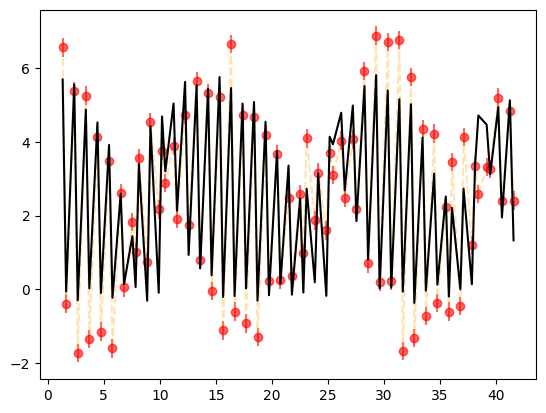

In [185]:
def fittedcurve(x,a,b,c,d,e,f,g,h,i):
    #return (a*np.sin((82*np.pi/b)*x+c))*((d*np.sin((82*np.pi/e)*x))+(g*np.sin((82*np.pi/h)*x+i))) + j #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
   
    return a*np.sin((b)*np.sin((c)*x+d)+i) + e*np.sin((f)*x+h)+g #best one so far ++++++++++++++++++++++++++++++++++++++++++++
    

#return (a*np.cos(b*x))*(np.sin(d*x)) + (e*np.sin(f*x))+g
    #return np.sin(np.sin(a*x)*x+c)+np.sin(b*x)+d
#   return h*np.cos(a*x)*np.sin(b*x+c)+d*np.cos(e*x+f)+g
    # return b*np.cos(c*x+d)*e*np.sin(f*x+g)+h*np.sin(i*x+j)+k
   # return a*(b*(c*np.sin(d*np.cos(e*x+f)*x+g)+h*np.sin(i*x+j))+k)+l
#maxfev=2170000000,p0=[9.00001,-2,10,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)

date=np.array(date)
height=np.array(height)
#maxfev=2170000000,p0=[9.00001,-2,10,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)


params,cov = curve_fit(fittedcurve,date,height,maxfev=2170000000,p0=[9.00002,-2,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)) #++++++++++++++++++++++++++++++++++++++=


#params, cov = curve_fit(fittedcurve,date,height,p0=[1,1,1,1,1,1,1,1,1,1],maxfev=10000000,method='trf',bounds=(-100,100)) #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

print(params)


fit = fittedcurve(date,*params) #*params unpacks the params[] list generated by curve_fit()
plt.errorbar(date,height,yerr=heighterr,color='red',alpha=0.6,fmt='o')
plt.plot(date,fit,color='black',zorder=3)
plt.plot(date,height,color='orange',linestyle='dashed',alpha=0.3)

fitstd=np.std(fit)
print(np.linalg.cond(cov))
np.diag(cov)

#create axes and figure instead of doing it this way, work on plot styling^^^852426 4261922.210839571


In [4]:
print(date[0:10])


[1.33819444 1.65069444 2.37152778 2.68402778 3.40625    3.71805556
 4.44097222 4.75       5.47777778 5.78194444]
